# MODELO DE REGRESIÓN

## Importación de librerías y datos

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
commentsDf = pd.read_excel("DataSets/comments_final.xlsx", encoding='latin-1')

In [3]:
commentsDf.head()

,id,tipo,campus,id_programa,nps,programa,id_externo_programa,id_modulo,modulo,instructor,...,fecha_inicio_modulo,fecha_fin_modulo,indicador,codigo_indicador,comentario,puntaje_sentimiento,sentimiento,categoria,subcategoria,grupo
0,1,B2B,CSF (Santa Fe),3483,-50.0,Consultoría de Negocio,csf_c_0901B11353_2,60328,M16 G1: Mercados Financieros Nacionales e Inte...,Gerardo Salazar Viezca,...,2018-05-11,2018-06-01,Retroalimentación para el Instructor,CAINST,"Que su curso lo haga mas dinámico, tiene una v...",-0.12,Negativo,Instructor,Dinamismo y Ejercicios,4
1,2,B2B,CSF (Santa Fe),3483,-50.0,Consultoría de Negocio,csf_c_0901B11353_2,60328,M16 G1: Mercados Financieros Nacionales e Inte...,Gerardo Salazar Viezca,...,2018-05-11,2018-06-01,Retroalimentación para el Instructor,CAINST,"El instructuor es muy bueno, conoce muy bien l...",0.46,Positivo,Instructor,Habilidad de Enseñanza,4
2,3,B2B,CSF (Santa Fe),3483,-50.0,Consultoría de Negocio,csf_c_0901B11353_2,60328,M16 G1: Mercados Financieros Nacionales e Inte...,Gerardo Salazar Viezca,...,2018-05-11,2018-06-01,Retroalimentación para el Instructor,CAINST,Todo estuvo bien. Me gustarían ejercicios prác...,0.10,Neutral,Instructor,Dinamismo y Ejercicios,4
3,4,B2B,CSF (Santa Fe),3483,-50.0,Consultoría de Negocio,csf_c_0901B11353_2,60328,M16 G1: Mercados Financieros Nacionales e Inte...,Gerardo Salazar Viezca,...,2018-05-11,2018-06-01,Retroalimentación para el Instructor,CAINST,"La clase estuvo excelente, pero sería major si...",0.30,Positivo,Programa,Diseño y Estructura (Coherencia),4
4,5,B2B,CSF (Santa Fe),3483,-50.0,Consultoría de Negocio,csf_c_0901B11353_2,60328,M16 G1: Mercados Financieros Nacionales e Inte...,Gerardo Salazar Viezca,...,2018-05-11,2018-06-01,Retroalimentación para el Instructor,CAINST,Actividades más dinámicas durante el curso,0.22,Positivo,Instructor,Dinamismo y Ejercicios,4


### Se agregan columnas de día, mes y año

In [5]:
commentsDf['start_day'] = pd.DatetimeIndex(commentsDf['fecha_inicio_modulo']).day
commentsDf['start_month'] = pd.DatetimeIndex(commentsDf['fecha_inicio_modulo']).month
commentsDf['start_year'] = pd.DatetimeIndex(commentsDf['fecha_inicio_modulo']).year

### Se obtiene el NPS por mes y año

#### Al mostrar el NPS por año, encontramos que de enero a julio en el 2018 el NPS estuvo por debajo de 75 y a partir de agosto se ha mentenido por arriba de 80, al menos hasta el mes de marzo del 2019, en el que llegó hasta 90 y parece mostrar una tendencia a la alza.

In [6]:
npsMonth = commentsDf[['start_month','start_year','nps']].sort_values('start_year').groupby(['start_year','start_month']).mean().dropna()
npsMonth

nps
start_year start_month           
2017       11           76.000000
           12           74.210000
2018       1            66.711775
           2            66.646169
           3            70.530493
           4            72.314089
           5            75.394792
           6            76.829931
           7            79.813980
           8            83.559746
           9            81.923239
           10           85.150396
           11           83.708701
           12           84.178310
2019       1            82.045927
           2            81.026520
           3            90.000000

### Lo mostramos en un Scatter Plot

#### En la gráfica podemos observar el NPS en cada mes sin importar el año y vemos como en los tres primeros meses hay una diferencia notable de más de 10 puntos, que nos habla de los inicios de 2019 en comparación con los de 2018.

#### Sin tomar en cuenta los valores atípicos podemos observar una línea de tendencia a la alza conforme avanzan los meses durante el año.

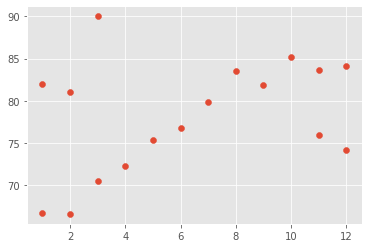

In [9]:
plt.scatter(years['start_month'],npsMonth['nps'])

### Algoritmo de regresión lineal

#### Al final del algoritmo obtenemos la R^2, que nos habla de la confiabilidad de nuestro modelo
#### En este caso la R^2 es de 0.88, es decir, que la calidad del modelo nos puede explicar en un 88% la variación de los datos

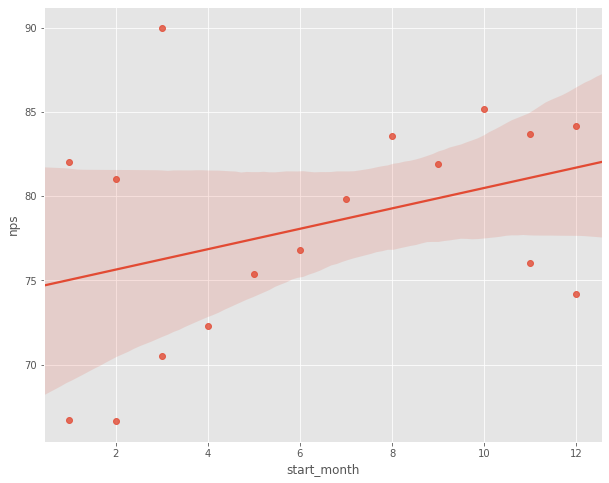

In [11]:
plt.figure(figsize=(10,8))
sns.regplot(y=npsMonth['nps'], x=years['start_month'], fit_reg = True)

In [8]:
years = commentsDf[['start_year','start_month']].drop_duplicates().sort_values(['start_year','start_month'])

years = years.iloc[3:,]


In [7]:
dataX = years
X_train = np.array(dataX)
y_train = npsMonth['nps'].values

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('R2 score: %.2f' % r2_score(y_train, y_pred))


Coefficients: 
 [13.75061336  1.85968178]
Independent term: 
 -27683.013784181177
Mean squared error: 4.96
R2 score: 0.88


### Una vez que tenemos los coeficientes y el modelo podemos predecir para los meses restantes del 2019

*  Hacemos el cálculo para cada mes a través de un loop y lo almacenamos en una estructura de datos, en este caso una lista.
*  Luego lo insertamos en un dataframe y podemos visualizarlo de forma tabular

In [56]:


predictedNPS = []
nextMonths = []
prediction = pd.DataFrame()
prediction['start_year'] = 2019
for i in range(4, 13):
    nextMonth = regr.predict([[2019,i]])
    nextMonths.append(i)
    predictedNPS.append(nextMonth[0])
print(nextMonths)
print(predictedNPS)
prediction['start_month'] = nextMonths
prediction['nps'] = predictedNPS
prediction['start_year'] = 2019






[4, 5, 6, 7, 8, 9, 10, 11, 12]
[86.91331135107612, 88.77299312800824, 90.632674904944, 92.49235668187612, 94.35203845880824, 96.21172023574036, 98.07140201267248, 99.9310837896046, 101.79076556653672]


### Predicción para los siguientes meses del 2019

#### Al obtener la predicción para los siguientes meses del 2019, podemos decir que de seguir trabajando como se venía haciendo en los últimos meses del 2018, el NPS se vería beneficiado teniendo valores cada vez más altos conforme avanza el tiempo 

In [57]:
prediction

,start_year,start_month,nps
0,2019,4,86.913311
1,2019,5,88.772993
2,2019,6,90.632675
3,2019,7,92.492357
4,2019,8,94.352038
5,2019,9,96.211720
6,2019,10,98.071402
7,2019,11,99.931084
8,2019,12,101.790766
